<a href="https://colab.research.google.com/github/LucasMirandaVS/projeto_time_series_analisys_covid/blob/main/Prevendo_os_%C3%B3bitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

import itertools
import statsmodels.api as sm

# Dados

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/Alura-COVID2/main/cases-brazil-states-att.csv'
df_total = pd.read_csv(url,index_col=0,parse_dates=[0])

### Sâo Paulo

In [3]:
df_sp = df_total[df_total['state'] == 'SP']
df_sp = df_sp.rename(columns={'date':'data','newDeaths':'ObitosDiarios'})
df_sp.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [4]:
df_sp['data'] = pd.to_datetime(df_sp['data'], format='%Y-%m-%d')
df_sp.index = df_sp['data']
df_sp.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-02-25,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [5]:
# Salvando o df original e aplicando slicing 
df_sp_2 = df_sp
df_sp = df_sp[0:300]
df_sp.tail()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-12-16,2020-12-16,Brazil,SP,TOTAL,0,44282,0,1341428,44282,1341428,96.43492,2921.28872,0.03301,1189305.0,NaN,6336829.0,13800.00052
2020-12-17,2020-12-17,Brazil,SP,TOTAL,399,44681,20303,1361731,44681,1361731,97.30384,2965.50349,0.03281,1189305.0,NaN,6336829.0,13800.00052
2020-12-18,2020-12-18,Brazil,SP,TOTAL,197,44878,9922,1371653,44878,1371653,97.73286,2987.11108,0.03272,1195792.0,NaN,6336829.0,13800.00052
2020-12-19,2020-12-19,Brazil,SP,TOTAL,151,45029,12447,1384100,45029,1384100,98.06170,3014.21748,0.03253,1196775.0,NaN,6336829.0,13800.00052
2020-12-20,2020-12-20,Brazil,SP,TOTAL,0,45029,0,1384100,45029,1384100,98.06170,3014.21748,0.03253,1205561.0,NaN,6336829.0,13800.00052


In [6]:
y = df_sp['ObitosDiarios']
y

data
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2020-12-16      0
2020-12-17    399
2020-12-18    197
2020-12-19    151
2020-12-20      0
Name: ObitosDiarios, Length: 300, dtype: int64

### Minas Gerais

In [7]:
df_mg = df_total[df_total['state'] == 'MG']
df_mg = df_mg.rename(columns={'date':'data','newDeaths':'ObitosDiarios'})
df_mg.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
11,2020-03-08,Brazil,MG,TOTAL,0,0,1,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-09,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-10,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-11,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
11,2020-03-12,Brazil,MG,TOTAL,0,0,1,2,0,1,0.0,0.00945,0.0,NaN,NaN,NaN,NaN


In [8]:
df_mg['data'] = pd.to_datetime(df_mg['data'], format='%Y-%m-%d')
df_mg.index = df_mg['data']
df_mg.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-03-08,2020-03-08,Brazil,MG,TOTAL,0,0,1,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-10,2020-03-10,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-11,2020-03-11,Brazil,MG,TOTAL,0,0,0,1,0,1,0.0,0.00472,0.0,NaN,NaN,NaN,NaN
2020-03-12,2020-03-12,Brazil,MG,TOTAL,0,0,1,2,0,1,0.0,0.00945,0.0,NaN,NaN,NaN,NaN


In [9]:
# Salvando o df original e aplicando slicing 
df_mg_2 = df_mg
df_mg = df_mg[0:300]
df_mg.tail()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-12-28,2020-12-28,Brazil,MG,TOTAL,13,11605,1110,524658,11605,524658,54.82127,2478.45047,0.02212,473047.0,NaN,2222723.0,10499.99974
2020-12-29,2020-12-29,Brazil,MG,TOTAL,10,11615,4995,529653,11615,529653,54.86851,2502.04653,0.02193,479188.0,NaN,2222723.0,10499.99974
2020-12-30,2020-12-30,Brazil,MG,TOTAL,169,11784,6391,536044,11784,536044,55.66685,2532.23720,0.02198,485887.0,NaN,2222723.0,10499.99974
2020-12-31,2020-12-31,Brazil,MG,TOTAL,118,11902,6865,542909,11902,542909,56.22428,2564.66701,0.02192,491437.0,NaN,2222723.0,10499.99974
2021-01-01,2021-01-01,Brazil,MG,TOTAL,99,12001,3975,546884,12001,546884,56.69195,2583.44466,0.02194,494278.0,NaN,2222723.0,10499.99974


In [10]:
z = df_mg['ObitosDiarios']
z

data
2020-03-08      0
2020-03-09      0
2020-03-10      0
2020-03-11      0
2020-03-12      0
             ... 
2020-12-28     13
2020-12-29     10
2020-12-30    169
2020-12-31    118
2021-01-01     99
Name: ObitosDiarios, Length: 300, dtype: int64

###  Rio de Janeiro

In [11]:
df_rj = df_total[df_total['state'] == 'RJ']
df_rj = df_rj.rename(columns={'date':'data','newDeaths':'ObitosDiarios'})
df_rj.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,1,0.0,0.00579,0.0,NaN,NaN,NaN,NaN
10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,1,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,2,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN
11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN


In [12]:
df_rj['data'] = pd.to_datetime(df_rj['data'], format='%Y-%m-%d')
df_rj.index = df_rj['data']
df_rj.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-03-05,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,1,0.0,0.00579,0.0,NaN,NaN,NaN,NaN
2020-03-06,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,1,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
2020-03-07,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,2,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
2020-03-08,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN


In [13]:
# Salvando o df original e aplicando slicing 
df_rj_2 = df_rj
df_rj = df_rj[0:300]
df_rj.tail()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-12-25,2020-12-25,Brazil,RJ,TOTAL,73,24900,603,419146,24900,419146,144.22289,2427.72884,0.05941,380338.0,NaN,2054528.0,11899.99874
2020-12-26,2020-12-26,Brazil,RJ,TOTAL,5,24905,929,420075,24905,420075,144.25185,2433.10968,0.05929,389775.0,NaN,2054528.0,11899.99874
2020-12-27,2020-12-27,Brazil,RJ,TOTAL,13,24918,994,421069,24918,421069,144.32715,2438.86702,0.05918,391223.0,NaN,2054528.0,11899.99874
2020-12-28,2020-12-28,Brazil,RJ,TOTAL,24,24942,605,421674,24942,421674,144.46616,2442.37123,0.05915,392179.0,NaN,2313502.0,13399.99790
2020-12-29,2020-12-29,Brazil,RJ,TOTAL,136,25078,4585,426259,25078,426259,145.25388,2468.92793,0.05883,396095.0,NaN,2313502.0,13399.99790


In [14]:
x = df_rj['ObitosDiarios']
x

data
2020-03-05      0
2020-03-06      0
2020-03-07      0
2020-03-08      0
2020-03-09      0
             ... 
2020-12-25     73
2020-12-26      5
2020-12-27     13
2020-12-28     24
2020-12-29    136
Name: ObitosDiarios, Length: 300, dtype: int64

### Espírito Santo

In [15]:
df_es = df_total[df_total['state'] == 'ES']
df_es = df_es.rename(columns={'date':'data','newDeaths':'ObitosDiarios'})
df_es.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
epi_week,,,,,,,,,,,,,,,,,
10,2020-03-06,Brazil,ES,TOTAL,0,0,1,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
10,2020-03-07,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
11,2020-03-08,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
11,2020-03-09,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
11,2020-03-10,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN


In [16]:
df_es['data'] = pd.to_datetime(df_es['data'], format='%Y-%m-%d')
df_es.index = df_es['data']
df_es.head()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-03-06,2020-03-06,Brazil,ES,TOTAL,0,0,1,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-07,2020-03-07,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-08,2020-03-08,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN
2020-03-10,2020-03-10,Brazil,ES,TOTAL,0,0,0,1,0,1,0.0,0.02488,0.0,NaN,NaN,NaN,NaN


In [17]:
# Salvando o df original e aplicando slicing 
df_es_2 = df_es
df_es = df_es[0:300]
df_es.tail()

,data,country,state,city,ObitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,
2020-12-26,2020-12-26,Brazil,ES,TOTAL,13,4928,1448,238426,4926,238377,122.62825,5932.98745,0.02067,218467.0,NaN,748907.0,18635.78565
2020-12-27,2020-12-27,Brazil,ES,TOTAL,13,4941,610,239036,4940,239032,122.95174,5948.16667,0.02067,219185.0,NaN,750711.0,18680.67635
2020-12-28,2020-12-28,Brazil,ES,TOTAL,55,4996,3517,242553,4960,241273,124.32036,6035.68363,0.02060,222312.0,NaN,757333.0,18845.45805
2020-12-29,2020-12-29,Brazil,ES,TOTAL,35,5031,1698,244251,5030,244057,125.19130,6077.93662,0.02060,224547.0,NaN,762688.0,18978.71176
2020-12-30,2020-12-30,Brazil,ES,TOTAL,35,5066,2676,246927,5061,246783,126.06223,6144.52615,0.02052,226910.0,NaN,768343.0,19119.43065


In [18]:
a = df_es['ObitosDiarios']
a

data
2020-03-06     0
2020-03-07     0
2020-03-08     0
2020-03-09     0
2020-03-10     0
              ..
2020-12-26    13
2020-12-27    13
2020-12-28    55
2020-12-29    35
2020-12-30    35
Name: ObitosDiarios, Length: 300, dtype: int64

# SARIMA

In [42]:
# Definindo os parametros do modelo
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [43]:
# Definindo os coponentes de sazonalidade
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

### AIC

In [44]:
# AIC de São Paulo
aic_list_sp = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_sp = mod.fit()
        aic_list_sp.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_sp.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [45]:
# AIC de Minas
aic_list_mg = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(z,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_mg = mod.fit()
        aic_list_mg.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_mg.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [46]:
# AIC do Rio
aic_list_rj = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(x,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_rj = mod.fit()
        aic_list_rj.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_rj.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [47]:
# AIC do Espíritio Santo
aic_list_es = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(a,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results_es = mod.fit()
        aic_list_es.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results_es.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

### Aplicando os modelos

SP

In [48]:
aic_list_sp

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4017.1944378824282',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3759.98498456342',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3285.0200137893753',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3234.858007762182',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3368.809788089205',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3323.050919537671',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3238.5985903038713',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3234.31428999649',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3840.1363160919395',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3666.3970533502456',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3286.3636014080384',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3236.5104088677367',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3370.7699981745727',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3324.2274661609426',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3240.500239529438',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3236.154529403908',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3712.2554406569598',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3610.9511220601944',
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


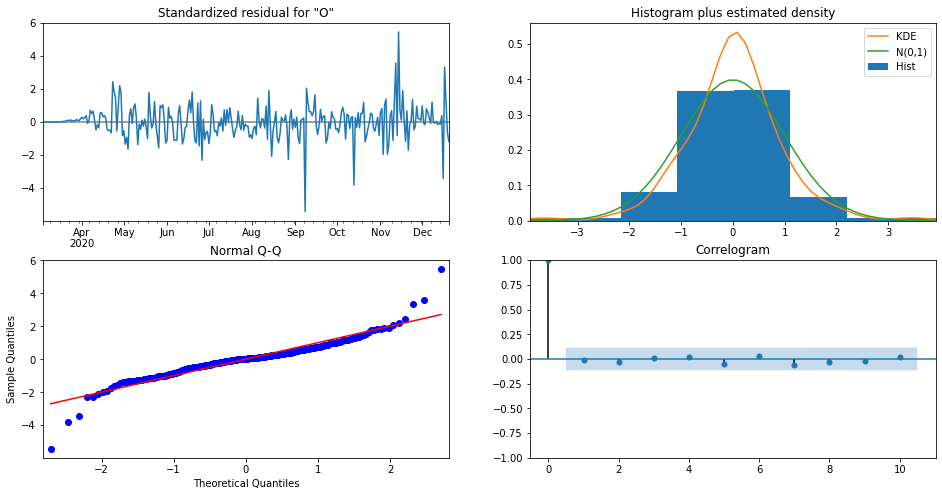

In [49]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order = (0,1,1,7))
results_sp = mod.fit()
results_sp.plot_diagnostics(figsize=(16,8))
plt.show()

MG

In [50]:
aic_list_mg

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3275.602447284602',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3092.054254780531',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC2785.6962266197233',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2723.0883292694184',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC2846.8319811089395',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC2797.0346479219197',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2732.0647937081294',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2723.8966024253996',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3117.506494639249',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3004.203815968634',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2786.8226043440727',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2720.213520348744',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC2844.620110963824',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC2792.3877000260154',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2733.0423681569896',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2721.6863543729205',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2997.9854477511744',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2959.7867417229218'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


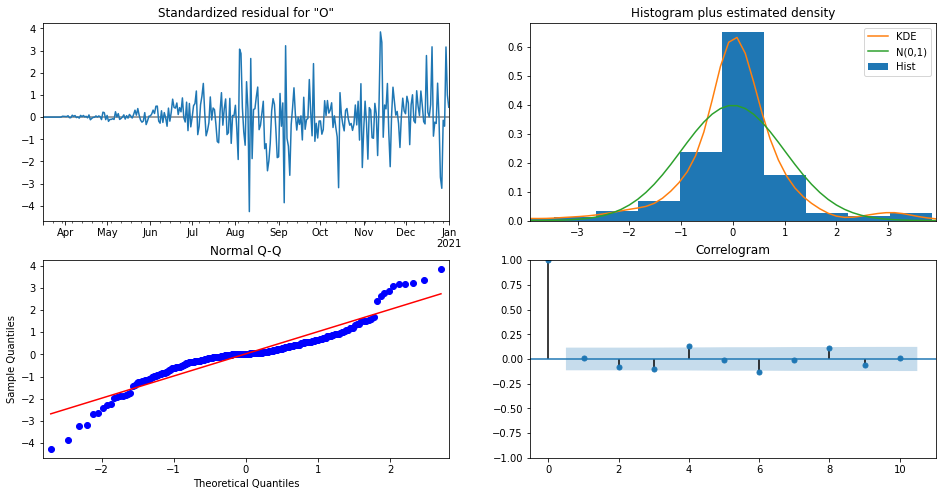

In [51]:
mod = sm.tsa.statespace.SARIMAX(z, order=(0,1,1), seasonal_order = (0,1,1,7))
results_mg = mod.fit()
results_mg.plot_diagnostics(figsize=(16,8))
plt.show()

RJ

In [52]:
aic_list_rj

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3666.9230623503104',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3452.004110774291',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3117.9350425641314',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3081.0955067622103',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3185.5411411350387',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3158.312955921355',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3086.0444074113793',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3083.06309695427',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3475.437280275405',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3358.214263291029',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3116.2745818585818',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3067.5675189630447',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3179.0847027591963',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3142.12006548794',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3075.2678461819332',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3069.5103732561183',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3335.7085029332957',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3292.9736999238653',


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


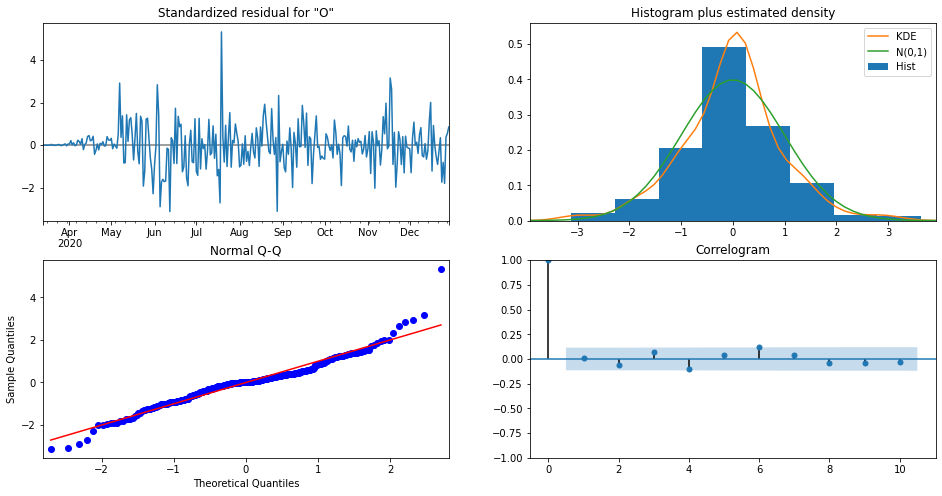

In [53]:
mod = sm.tsa.statespace.SARIMAX(x, order=(0,1,1), seasonal_order = (0,1,1,7))
results_rj = mod.fit()
results_rj.plot_diagnostics(figsize=(16,8))
plt.show()

ES

In [54]:
aic_list_es

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC2682.142018527056',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC2464.8974478640175',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC2066.53070773522',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2031.5058573951117',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC2120.728485332271',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC2091.744803555925',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2027.227080909487',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2028.95442101576',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC2457.2979274246245',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC2343.110314347134',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2067.319728546695',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2023.1279567102492',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC2118.6522070164438',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC2080.5686157464993',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2023.6241785842035',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2022.4144102476703',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2180.333245448563',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2168.2250093363164',
 'A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


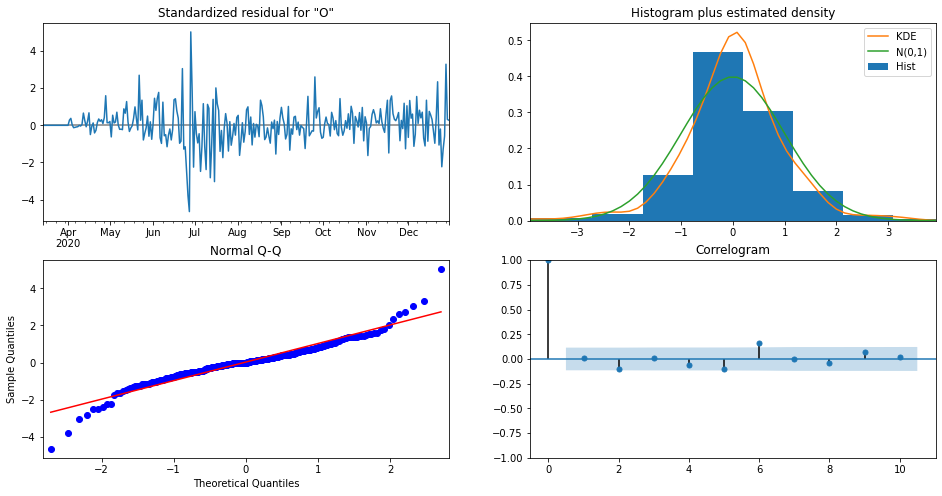

In [55]:
mod = sm.tsa.statespace.SARIMAX(a, order=(0,1,1), seasonal_order = (0,1,1,7))
results_es = mod.fit()
results_es.plot_diagnostics(figsize=(16,8))
plt.show()

# Prevendo os óbitos

### São Paulo

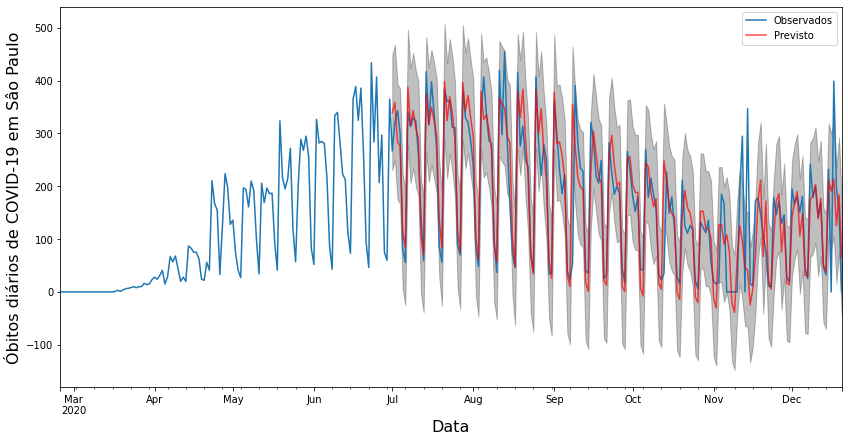

In [57]:
plt.figure(figsize=(14,7))
pred_sp = results_sp.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ci_sp = pred_sp.conf_int()
ax = y['2020':].plot(label='Observados')
pred_sp.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_sp.index, pred_ci_sp.iloc[:,0], pred_ci_sp.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19 em Sâo Paulo',fontsize=16)
plt.show()

Text(0, 0.5, 'Óbitos diários de COVID-19')

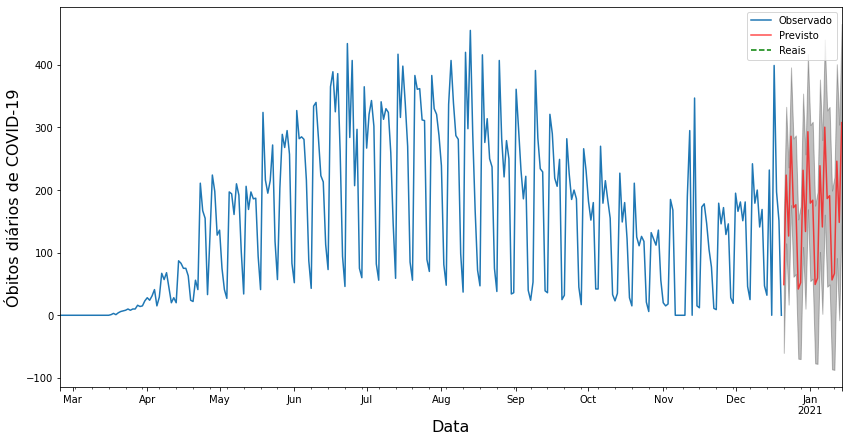

In [35]:
# Prevendo 25 dias
pred_uc_sp = results_sp.get_forecast(steps = 25)
pred_ci_sp = pred_uc_sp.conf_int()
ax = y.plot(label='Observado',figsize=(14,7))
pred_uc_sp.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_sp.index, pred_ci_sp.iloc[:,0], pred_ci_sp.iloc[:,1],color='k',alpha=0.25)
fig = plt.plot(x,linestyle='--',color='green',label='Reais')

plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19',fontsize=16)

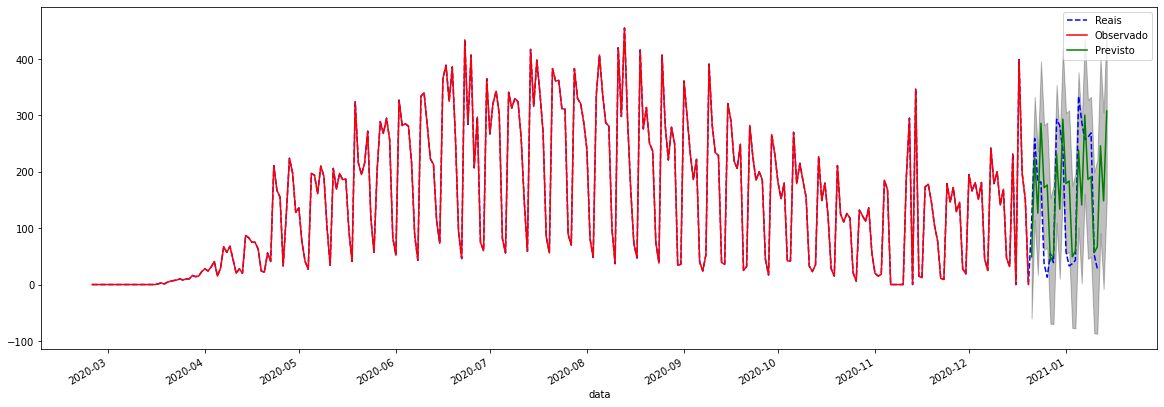

In [39]:
y_2 = df_sp_2['ObitosDiarios']
plt.figure(figsize=(20,7))
fig = plt.plot(y_2,linestyle='--',color='b',label='Reais')
ax = y.plot(label='Observado', color='red')
pred_uc_sp.predicted_mean.plot(ax=ax, color='green', label='Previsto')
ax.fill_between(pred_ci_sp.index, pred_ci_sp.iloc[:,0], pred_ci_sp.iloc[:,1],color='k',alpha=0.25)
plt.legend()

### Minas Gerais

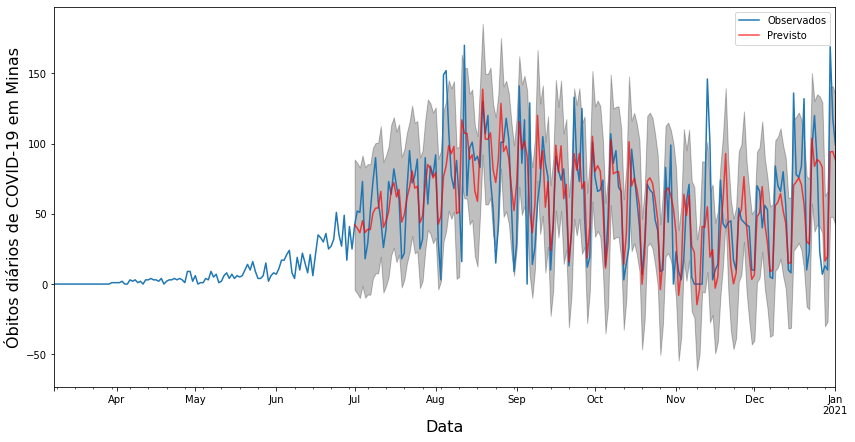

In [58]:
plt.figure(figsize=(14,7))
pred_mg = results_mg.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ci_mg = pred_mg.conf_int()
ax = z['2020':].plot(label='Observados')
pred_mg.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_mg.index, pred_ci_mg.iloc[:,0], pred_ci_mg.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19 em Minas',fontsize=16)
plt.show()

Text(0, 0.5, 'Óbitos diários de COVID-19 em Minas')

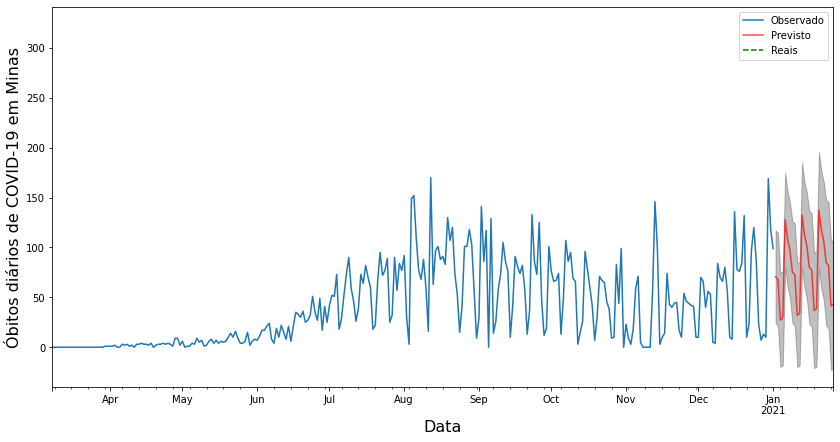

In [59]:
# Prevendo 25 dias
pred_uc_mg = results_mg.get_forecast(steps = 25)
pred_ci_mg = pred_uc_mg.conf_int()
ax = z.plot(label='Observado',figsize=(14,7))
pred_uc_mg.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_mg.index, pred_ci_mg.iloc[:,0], pred_ci_mg.iloc[:,1],color='k',alpha=0.25)
fig = plt.plot(x,linestyle='--',color='green',label='Reais')

plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19 em Minas',fontsize=16)

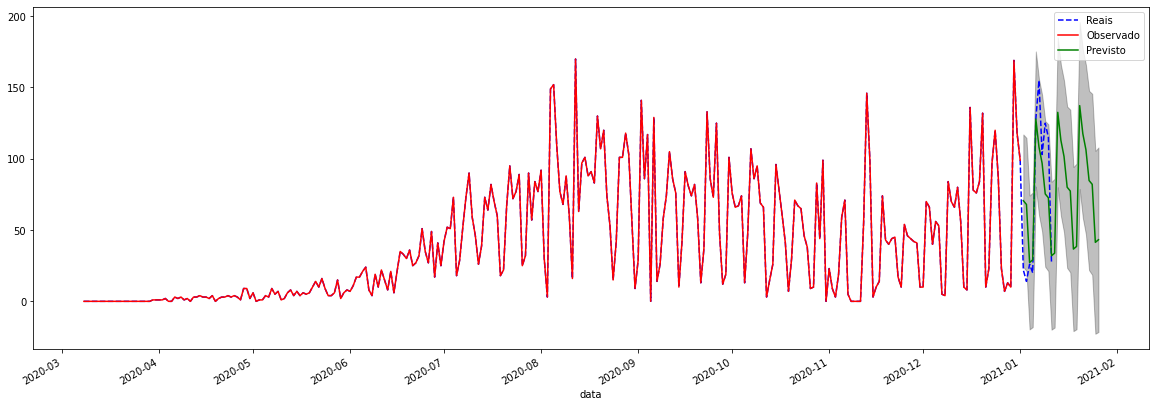

In [60]:
z_2 = df_mg_2['ObitosDiarios']
plt.figure(figsize=(20,7))
fig = plt.plot(z_2,linestyle='--',color='b',label='Reais')
ax = z.plot(label='Observado', color='red')
pred_uc_mg.predicted_mean.plot(ax=ax, color='green', label='Previsto')
ax.fill_between(pred_ci_mg.index, pred_ci_mg.iloc[:,0], pred_ci_mg.iloc[:,1],color='k',alpha=0.25)
plt.legend()

### Rio de Janeiro

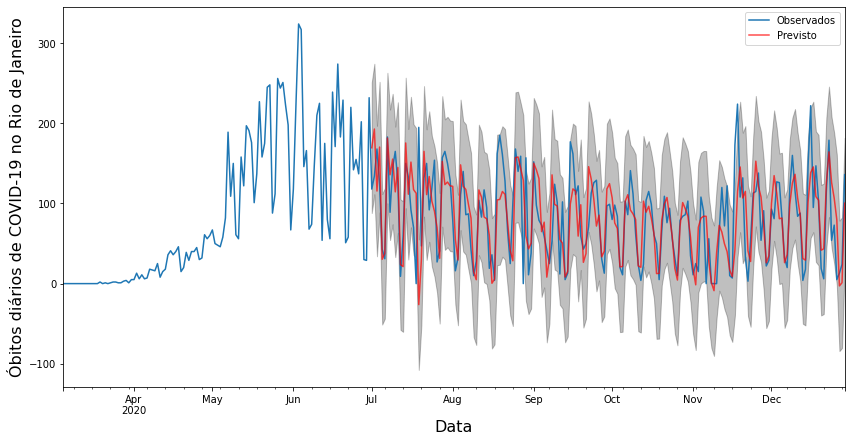

In [63]:
plt.figure(figsize=(14,7))
pred_rj = results_rj.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ci_rj = pred_rj.conf_int()
ax = x['2020':].plot(label='Observados')
pred_rj.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_rj.index, pred_ci_rj.iloc[:,0], pred_ci_rj.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19 no Rio de Janeiro',fontsize=16)
plt.show()

Text(0, 0.5, 'Óbitos diários de COVID-19 no Rio de Janeiro')

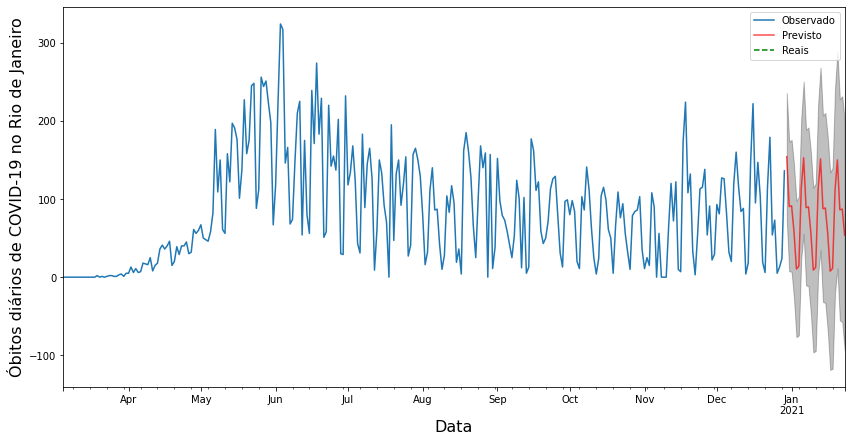

In [64]:
# Prevendo 25 dias
pred_uc_rj = results_rj.get_forecast(steps = 25)
pred_ci_rj = pred_uc_rj.conf_int()
ax = x.plot(label='Observado',figsize=(14,7))
pred_uc_rj.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_rj.index, pred_ci_rj.iloc[:,0], pred_ci_rj.iloc[:,1],color='k',alpha=0.25)
fig = plt.plot(x,linestyle='--',color='green',label='Reais')

plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19 no Rio de Janeiro',fontsize=16)

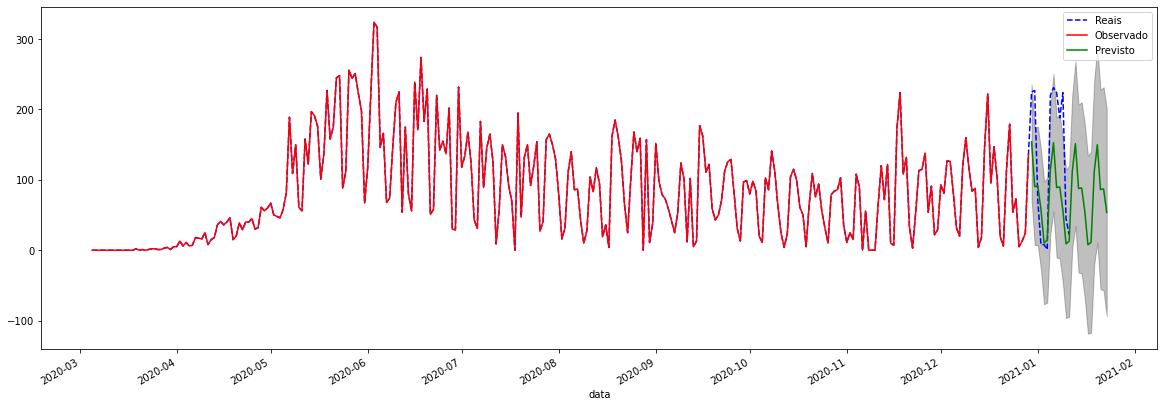

In [65]:
x_2 = df_rj_2['ObitosDiarios']
plt.figure(figsize=(20,7))
fig = plt.plot(x_2,linestyle='--',color='b',label='Reais')
ax = x.plot(label='Observado', color='red')
pred_uc_rj.predicted_mean.plot(ax=ax, color='green', label='Previsto')
ax.fill_between(pred_ci_rj.index, pred_ci_rj.iloc[:,0], pred_ci_rj.iloc[:,1],color='k',alpha=0.25)
plt.legend()

### Espírito Santo

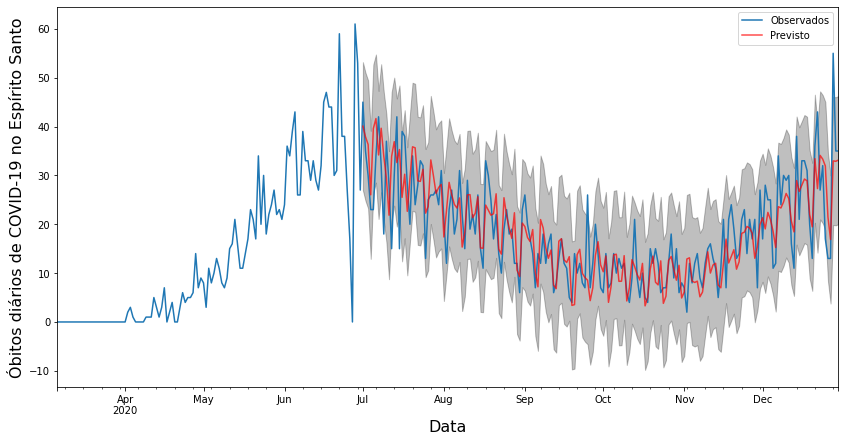

In [66]:
plt.figure(figsize=(14,7))
pred_es = results_es.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ci_es = pred_es.conf_int()
ax = a['2020':].plot(label='Observados')
pred_es.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_es.index, pred_ci_es.iloc[:,0], pred_ci_es.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19 no Espírito Santo',fontsize=16)
plt.show()

Text(0, 0.5, 'Óbitos diários de COVID-19 no Espírito Santo')

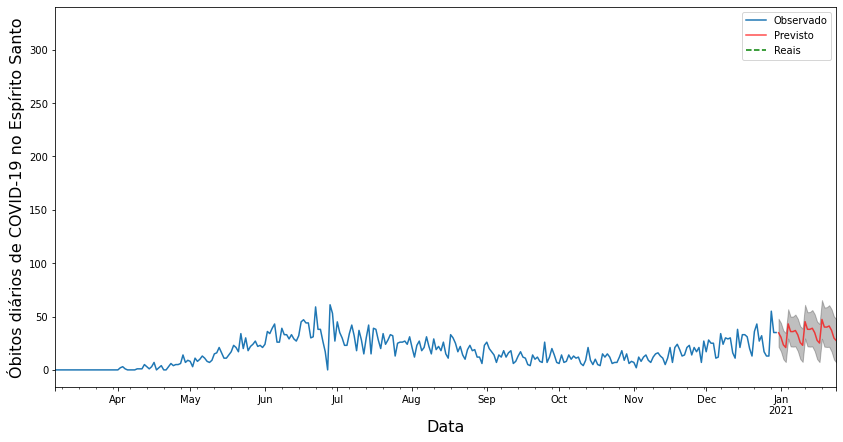

In [67]:
# Prevendo 25 dias
pred_uc_es = results_es.get_forecast(steps = 25)
pred_ci_es = pred_uc_es.conf_int()
ax = a.plot(label='Observado',figsize=(14,7))
pred_uc_es.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci_es.index, pred_ci_es.iloc[:,0], pred_ci_es.iloc[:,1],color='k',alpha=0.25)
fig = plt.plot(x,linestyle='--',color='green',label='Reais')

plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Óbitos diários de COVID-19 no Espírito Santo',fontsize=16)

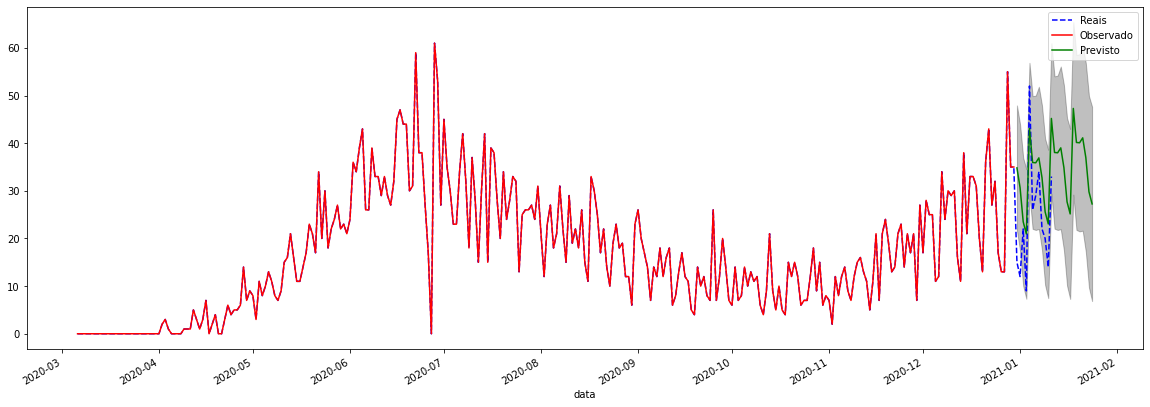

In [69]:
a_2 = df_es_2['ObitosDiarios']
plt.figure(figsize=(20,7))
fig = plt.plot(a_2,linestyle='--',color='b',label='Reais')
ax = a.plot(label='Observado', color='red')
pred_uc_es.predicted_mean.plot(ax=ax, color='green', label='Previsto')
ax.fill_between(pred_ci_es.index, pred_ci_es.iloc[:,0], pred_ci_es.iloc[:,1],color='k',alpha=0.25)
plt.legend()